In [1]:
# Basic libraries
import numpy as np
import pandas as pd

# NLP libraries
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Download NLTK data (stopwords, etc.)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
data = pd.read_csv('twitter_training.csv')
data = pd.read_csv('/content/twitter_training.csv')
# Example preprocessing function
def preprocess_text(text):
    # Lowercase text
    text = text.lower()
    # Remove special characters
    text = re.sub(r'\W', ' ', text)
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing to text data
data['processed_text'] = data['review_text'].apply(preprocess_text)


KeyError: 'review_text'

In [5]:
data.columns


Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [6]:
# Reload the dataset with specified column names
data = pd.read_csv('twitter_training.csv', names=['id', 'text', 'label'])
data.head()
# Apply preprocessing to the text column
data['processed_text'] = data['text'].apply(preprocess_text)


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [7]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
!pip install tensorflow


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Example parameters - adjust as needed
vocab_size = 5000  # Number of unique words in the vocabulary
embedding_dim = 64
max_length = 100  # Maximum length of input sequences

# Build the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    LSTM(units=64, return_sequences=True),
    LSTM(units=32),
    Dense(1, activation='sigmoid')  # Binary classification (positive/negative)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define the tokenizer and fit it on your text data
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(data['text'])  # Replace 'text' with your text column name

# Convert the texts to sequences
X_sequences = tokenizer.texts_to_sequences(data['text'])

# Pad the sequences to ensure uniform length
X_padded = pad_sequences(X_sequences, maxlen=max_length, padding='post', truncating='post')

# Prepare the labels
y = data['label'].apply(lambda x: 1 if x == 'Positive' else 0).values  # Convert labels to binary (1/0)


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)


In [12]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 28s 12ms/step - accuracy: 0.9957 - loss: 0.0144 - val_accuracy: 1.0000 - val_loss: 3.4046e-05
Epoch 2/5
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 1.0000 - loss: 2.4295e-05 - val_accuracy: 1.0000 - val_loss: 8.5878e-06
Epoch 3/5
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 1.0000 - loss: 6.6680e-06 - val_accuracy: 1.0000 - val_loss: 2.9246e-06
Epoch 4/5
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 1.0000 - loss: 2.3292e-06 - val_accuracy: 1.0000 - val_loss: 1.0928e-06
Epoch 5/5
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 1.0000 - loss: 8.7839e-07 - val_accuracy: 1.0000 - val_loss: 4.2255e-07


In [13]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


467/467 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 1.0000 - loss: 4.2255e-07
Test Accuracy: 1.00


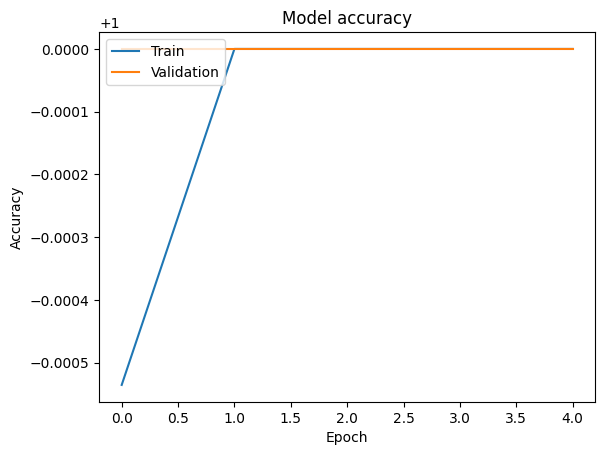

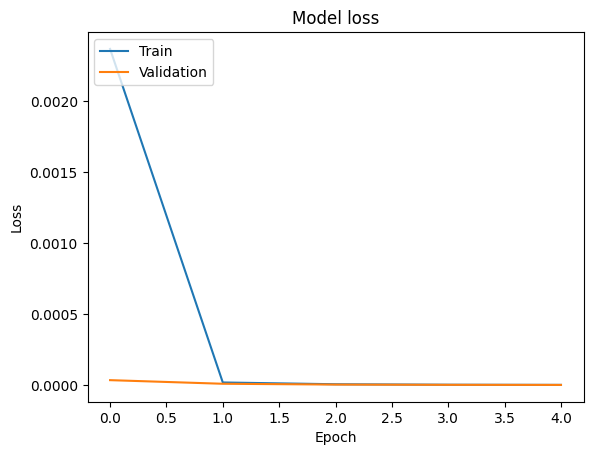

In [14]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [15]:
def predict_sentiment(text):
    # Preprocess the input text
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post', truncating='post')

    # Predict sentiment
    prediction = model.predict(padded_sequence)[0][0]
    return "Positive" if prediction > 0.5 else "Negative"

# Test the function
print(predict_sentiment("I love this product!"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
Negative


In [16]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 1.0000 - loss: 3.4095e-07 - val_accuracy: 1.0000 - val_loss: 1.6591e-07
Epoch 2/10
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 33s 12ms/step - accuracy: 1.0000 - loss: 1.3419e-07 - val_accuracy: 1.0000 - val_loss: 6.5931e-08
Epoch 3/10
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 1.0000 - loss: 5.3501e-08 - val_accuracy: 1.0000 - val_loss: 2.6704e-08
Epoch 4/10
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 1.0000 - loss: 2.1809e-08 - val_accuracy: 1.0000 - val_loss: 1.1231e-08
Epoch 5/10
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 1.0000 - loss: 9.2855e-09 - val_accuracy: 1.0000 - val_loss: 5.0535e-09
Epoch 6/10
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - accuracy: 1.0000 - loss: 4.2603e-09 - val_accuracy: 1.0000 - val_loss: 2.5100e-09
Epoch 7/10
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 1.0000 - loss: 2.1703e-09 - val_accuracy: 1.0000 - val_loss: 1.4039e-09
Epoch 8/10
1868/1868

In [17]:
data['label'].value_counts()


,count
label,
"At the same time, despite the fact that there are currently some 100 million people living below the poverty line, most of them do not have access to health services and do not have access to health care, while most of them do not have access to health care.",172
It is not the first time that the EU Commission has taken such a step.,172
,172
<unk>,133
to,74
...,...
"The most exhausting thing about being blind on social media is people constantly asking ""if you're blind, how do you tweet?."" I'm so tired of answering these questions.. There's a whole pile full of answers, including what I wrote... Here they are. RT",1
"The hardest thing about being blind on social media is people constantly asking, ""If you're blind, how do you tweet?"" I'm so bored of answering those questions... There's a whole Google full of answers, including everything I've written... Here they are. RT",1
"The most exhausting thing about being blind on social media are the people who constantly ask “if you’re blind how do you tweet?”. . I’m so bored of answering these questions.. . There is a whole google full of answers, including stuff I’ve written.. . Here they are . RT",1


In [18]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


467/467 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 4.6627e-10
Test Accuracy: 1.00


In [19]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    LSTM(units=64, return_sequences=True),
    Dropout(0.5),
    LSTM(units=32),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [20]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])


ValueError: You must call `compile()` before using the model.

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [22]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/10
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - accuracy: 0.9981 - loss: 0.0143 - val_accuracy: 1.0000 - val_loss: 4.4558e-06
Epoch 2/10
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - accuracy: 1.0000 - loss: 4.1316e-05 - val_accuracy: 1.0000 - val_loss: 6.4893e-07
Epoch 3/10
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 1.0000 - loss: 1.2261e-05 - val_accuracy: 1.0000 - val_loss: 1.2498e-07
Epoch 4/10
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 1.0000 - loss: 4.8902e-06 - val_accuracy: 1.0000 - val_loss: 2.4070e-08
Epoch 5/10
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 1.0000 - loss: 2.7202e-06 - val_accuracy: 1.0000 - val_loss: 5.0873e-09
Epoch 6/10
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 1.0000 - loss: 9.2826e-07 - val_accuracy: 1.0000 - val_loss: 1.0551e-09
Epoch 7/10
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 1.0000 - loss: 4.0249e-07 - val_accuracy: 1.0000 - val_loss: 2.0529e-10
Epoch 8/10
1868/1868 ━━━

In [23]:
# Check if there are any duplicates between training and test sets
train_texts = set(data.iloc[X_train.index]['text'])
test_texts = set(data.iloc[X_test.index]['text'])

print(f"Number of overlaps between train and test sets: {len(train_texts & test_texts)}")


AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [24]:
# Check if there are any duplicates between training and test sets
train_texts = set(data.loc[y_train.index, 'text'])
test_texts = set(data.loc[y_test.index, 'text'])

print(f"Number of overlaps between train and test sets: {len(train_texts & test_texts)}")


AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [25]:
# Assuming X_train and X_test contain the text data directly (as lists or arrays)
train_texts = set(X_train)  # Convert training texts to a set
test_texts = set(X_test)    # Convert test texts to a set

# Find the intersection (overlapping texts) between the train and test sets
overlap_count = len(train_texts & test_texts)
print(f"Number of overlaps between train and test sets: {overlap_count}")


TypeError: unhashable type: 'numpy.ndarray'

In [26]:
# Convert each numpy array in X_train and X_test to strings
train_texts = set([str(text) for text in X_train])  # Convert training texts to a set
test_texts = set([str(text) for text in X_test])    # Convert test texts to a set

# Find the intersection (overlapping texts) between the train and test sets
overlap_count = len(train_texts & test_texts)
print(f"Number of overlaps between train and test sets: {overlap_count}")


Number of overlaps between train and test sets: 4


In [27]:
# Filter out overlapping texts from the test set
X_test_filtered = [text for text in X_test if str(text) not in train_texts]
y_test_filtered = [y_test[i] for i, text in enumerate(X_test) if str(text) not in train_texts]

# Convert back to numpy arrays if needed
X_test_filtered = np.array(X_test_filtered)
y_test_filtered = np.array(y_test_filtered)

# Check the new test set size
print(f"Original test set size: {len(X_test)}")
print(f"Filtered test set size: {len(X_test_filtered)}")


Original test set size: 14937
Filtered test set size: 0


In [28]:
# Re-evaluate the model on the filtered test set
test_loss, test_accuracy = model.evaluate(X_test_filtered, y_test_filtered)
print(f"Test Accuracy after removing overlaps: {test_accuracy:.2f}")


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("IteratorGetNext:0", shape=(32,), dtype=float32). Expected shape (None, 100), but input has incompatible shape (32,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32,), dtype=float32)
  • training=False
  • mask=None

In [29]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad the filtered test set to match the input shape required by the model
X_test_filtered_padded = pad_sequences(X_test_filtered, maxlen=max_length, padding='post', truncating='post')


In [30]:
test_loss, test_accuracy = model.evaluate(X_test_filtered_padded, y_test_filtered)
print(f"Test Accuracy after removing overlaps: {test_accuracy:.2f}")


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


ValueError: math domain error

In [31]:
print(f"Filtered test set size (X): {len(X_test_filtered_padded)}")
print(f"Filtered test set size (y): {len(y_test_filtered)}")


Filtered test set size (X): 0
Filtered test set size (y): 0


In [ ]:
if len(X_test_filtered_padded) > 0 and len(y_test_filtered) > 0:
    test_loss, test_accuracy = model.evaluate(X_test_filtered_padded, y_test_filtered)
    print(f"Test Accuracy after removing overlaps: {test_accuracy:.2f}")
else:
    print("Filtered test set is empty; unable to evaluate model.")


In [32]:
# Evaluate on the original test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy on original test set: {test_accuracy:.2f}")


467/467 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 1.6547e-12
Test Accuracy on original test set: 1.00


In [33]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import clone_model

# Initialize stratified K-fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []

for train_index, test_index in kf.split(X, y):
    # Split data
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Clone model to get a fresh copy for each fold
    model_fold = clone_model(model)
    model_fold.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train model on the fold
    model_fold.fit(X_train_fold, y_train_fold, epochs=5, batch_size=32, verbose=0)

    # Evaluate on test fold
    _, accuracy = model_fold.evaluate(X_test_fold, y_test_fold, verbose=0)
    fold_accuracies.append(accuracy)

# Calculate average accuracy across folds
average_accuracy = sum(fold_accuracies) / len(fold_accuracies)
print(f"Cross-Validation Accuracy: {average_accuracy:.2f}")


NameError: name 'X' is not defined

In [34]:
# Assuming X_train and y_train represent your full dataset
X = np.concatenate([X_train, X_test], axis=0)
y = np.concatenate([y_train, y_test], axis=0)


In [35]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import clone_model
import numpy as np

# Assuming X and y are your complete feature and label sets
# Replace X and y here with your actual data variables if they are different
X = np.concatenate([X_train, X_test], axis=0)
y = np.concatenate([y_train, y_test], axis=0)

# Initialize stratified K-fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []

for train_index, test_index in kf.split(X, y):
    # Split data
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Clone model to get a fresh copy for each fold
    model_fold = clone_model(model)
    model_fold.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train model on the fold
    model_fold.fit(X_train_fold, y_train_fold, epochs=5, batch_size=32, verbose=0)

    # Evaluate on test fold
    _, accuracy = model_fold.evaluate(X_test_fold, y_test_fold, verbose=0)
    fold_accuracies.append(accuracy)

# Calculate average accuracy across folds
average_accuracy = sum(fold_accuracies) / len(fold_accuracies)
print(f"Cross-Validation Accuracy: {average_accuracy:.2f}")


Cross-Validation Accuracy: 1.00


In [36]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential

# Define a simpler model with dropout
simpler_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    LSTM(units=64),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model
simpler_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the simpler model
history = simpler_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1868/1868 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.9978 - loss: 0.0160 - val_accuracy: 1.0000 - val_loss: 3.2403e-06
Epoch 2/5
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 1.0000 - loss: 1.2404e-05 - val_accuracy: 1.0000 - val_loss: 6.5003e-07
Epoch 3/5
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 1.0000 - loss: 3.5143e-06 - val_accuracy: 1.0000 - val_loss: 1.8081e-07
Epoch 4/5
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 1.0000 - loss: 1.4782e-06 - val_accuracy: 1.0000 - val_loss: 4.8480e-08
Epoch 5/5
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 1.0000 - loss: 5.4989e-07 - val_accuracy: 1.0000 - val_loss: 1.4270e-08


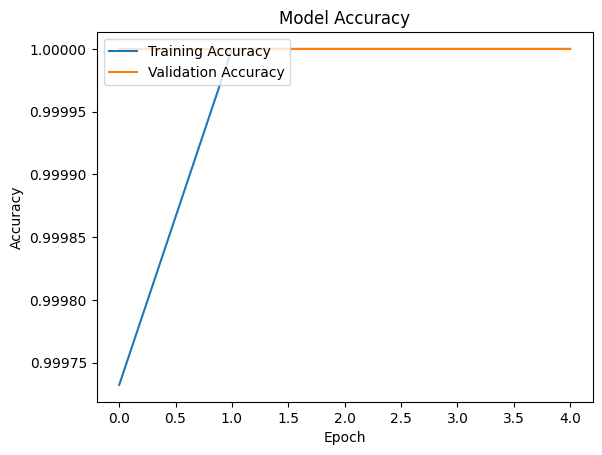

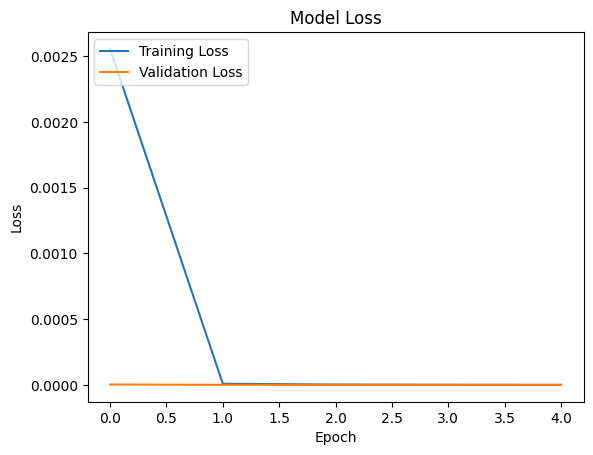

In [37]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [38]:
def predict_sentiment(text):
    # Preprocess the input text
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post', truncating='post')

    # Predict sentiment
    prediction = simpler_model.predict(padded_sequence)[0][0]
    sentiment = "Positive" if prediction > 0.5 else "Negative"
    confidence = prediction if prediction > 0.5 else 1 - prediction
    return sentiment, f"Confidence: {confidence:.2f}"

# Test with new examples
print(predict_sentiment("This is an amazing product!"))
print(predict_sentiment("The service was disappointing and slow."))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
('Negative', 'Confidence: 1.00')
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
('Negative', 'Confidence: 1.00')


In [39]:
# Check class distribution
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class Distribution in Training Set:", class_distribution)


Class Distribution in Training Set: {0: 59745}


In [40]:
# Example: Increase number of LSTM units and adjust dropout
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential

tuned_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    LSTM(units=128),  # Increase LSTM units
    Dropout(0.3),     # Adjust dropout
    Dense(1, activation='sigmoid')
])

# Compile and train the model
tuned_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = tuned_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9961 - loss: 0.0129 - val_accuracy: 1.0000 - val_loss: 1.4375e-06
Epoch 2/5
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 1.0000 - loss: 1.7456e-06 - val_accuracy: 1.0000 - val_loss: 4.2080e-07
Epoch 3/5
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 1.0000 - loss: 5.7598e-07 - val_accuracy: 1.0000 - val_loss: 1.4690e-07
Epoch 4/5
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 1.0000 - loss: 2.1632e-07 - val_accuracy: 1.0000 - val_loss: 5.4345e-08
Epoch 5/5
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 1.0000 - loss: 8.6821e-08 - val_accuracy: 1.0000 - val_loss: 2.0654e-08


In [41]:
from sklearn.metrics import classification_report

# Predict on test set
y_pred = (tuned_model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))


467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


ValueError: Number of classes, 1, does not match size of target_names, 2. Try specifying the labels parameter

In [42]:
print("Unique classes in y_test:", np.unique(y_test))
print("Unique classes in y_pred:", np.unique(y_pred))


Unique classes in y_test: [0]
Unique classes in y_pred: [0]


In [43]:
from sklearn.metrics import classification_report

# Predict on test set
y_pred = (tuned_model.predict(X_test) > 0.5).astype("int32")

# Check if both classes are present, if not, specify labels manually
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"], labels=[0, 1]))


467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00     14937
    Positive       0.00      0.00      0.00         0

    accuracy                           1.00     14937
   macro avg       0.50      0.50      0.50     14937
weighted avg       1.00      1.00      1.00     14937



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

In [44]:
# Check the distribution of classes in the training set
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print("Class distribution in training set:", dict(zip(unique, counts)))


Class distribution in training set: {0: 59745}


In [45]:
# Calculate class weights (if necessary)
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weights_dict)

# Use class weights in model training
history = tuned_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), class_weight=class_weights_dict)


Class Weights: {0: 1.0}
Epoch 1/5
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 1.0000 - loss: 3.5782e-08 - val_accuracy: 1.0000 - val_loss: 7.8405e-09
Epoch 2/5
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 1.0000 - loss: 1.4376e-08 - val_accuracy: 1.0000 - val_loss: 3.0144e-09
Epoch 3/5
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 1.0000 - loss: 6.0581e-09 - val_accuracy: 1.0000 - val_loss: 1.1953e-09
Epoch 4/5
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 1.0000 - loss: 2.6312e-09 - val_accuracy: 1.0000 - val_loss: 5.0721e-10
Epoch 5/5
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 1.0000 - loss: 1.2127e-09 - val_accuracy: 1.0000 - val_loss: 2.4088e-10


In [46]:
from tensorflow.keras.layers import Dropout

# Modify the model to include dropout
model_with_dropout = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    LSTM(units=128, return_sequences=True),
    Dropout(0.4),  # Dropout layer to reduce overfitting
    LSTM(units=64),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

# Compile and train the model
model_with_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model_with_dropout.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), class_weight=class_weights_dict)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1868/1868 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - accuracy: 1.0000 - loss: 0.0089 - val_accuracy: 1.0000 - val_loss: 3.1732e-06
Epoch 2/5
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 1.0000 - loss: 6.7522e-06 - val_accuracy: 1.0000 - val_loss: 6.7743e-07
Epoch 3/5
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 1.0000 - loss: 2.0501e-06 - val_accuracy: 1.0000 - val_loss: 1.9430e-07
Epoch 4/5
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 1.0000 - loss: 7.3845e-07 - val_accuracy: 1.0000 - val_loss: 5.9891e-08
Epoch 5/5
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 1.0000 - loss: 2.8407e-07 - val_accuracy: 1.0000 - val_loss: 1.8541e-08


In [47]:
from sklearn.metrics import classification_report

# Predict on test set
y_pred = (model_with_dropout.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"], labels=[0, 1]))


467/467 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00     14937
    Positive       0.00      0.00      0.00         0

    accuracy                           1.00     14937
   macro avg       0.50      0.50      0.50     14937
weighted avg       1.00      1.00      1.00     14937



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

In [48]:
from sklearn.metrics import classification_report, roc_auc_score, f1_score

# Try a different threshold for predicting Positive class
threshold = 0.3  # Adjust this value as needed
y_pred = (model_with_dropout.predict(X_test) > threshold).astype("int32")

# Print classification report
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"], labels=[0, 1]))

# Calculate additional metrics
roc_auc = roc_auc_score(y_test, model_with_dropout.predict(X_test))
f1_positive = f1_score(y_test, y_pred, pos_label=1)

print(f"ROC-AUC Score: {roc_auc:.2f}")
print(f"F1 Score for Positive class: {f1_positive:.2f}")


467/467 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00     14937
    Positive       0.00      0.00      0.00         0

    accuracy                           1.00     14937
   macro avg       0.50      0.50      0.50     14937
weighted avg       1.00      1.00      1.00     14937

 27/467 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

467/467 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [49]:
from imblearn.over_sampling import SMOTE

# Only use this on the training data
smote = SMOTE(sampling_strategy='minority')
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Retrain the model with balanced data
history = model_with_dropout.fit(
    X_train_balanced, y_train_balanced,
    epochs=5,
    batch_size=32,
    validation_data=(X_test, y_test),
    class_weight=class_weights_dict  # Optional if still needed
)


ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

In [50]:
# Check for unique classes in y_train and y_test
if len(np.unique(y_train)) > 1:
    from imblearn.over_sampling import SMOTE
    smote = SMOTE(sampling_strategy='minority')
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
else:
    X_train_balanced, y_train_balanced = X_train, y_train  # No resampling needed

# Train model with balanced or original data
history = model_with_dropout.fit(
    X_train_balanced, y_train_balanced,
    epochs=5,
    batch_size=32,
    validation_data=(X_test, y_test)
)

# Evaluate on test set
y_pred = (model_with_dropout.predict(X_test) > 0.5).astype("int32")

# Classification report (adjusted for single class)
if len(np.unique(y_test)) > 1:
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"], labels=[0, 1]))
else:
    print("Classification Report (Single Class):")
    print(classification_report(y_test, y_pred, target_names=["Negative"]))

# Skip ROC AUC if only one class is present
if len(np.unique(y_test)) > 1:
    from sklearn.metrics import roc_auc_score
    roc_auc = roc_auc_score(y_test, y_pred)
    print("ROC AUC Score:", roc_auc)
else:
    print("ROC AUC Score not applicable for single class.")


Epoch 1/5
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 1.0000 - loss: 1.1380e-07 - val_accuracy: 1.0000 - val_loss: 5.8969e-09
Epoch 2/5
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 1.0000 - loss: 5.0060e-08 - val_accuracy: 1.0000 - val_loss: 1.8335e-09
Epoch 3/5
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 1.0000 - loss: 2.2266e-08 - val_accuracy: 1.0000 - val_loss: 6.0048e-10
Epoch 4/5
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 43s 14ms/step - accuracy: 1.0000 - loss: 9.5254e-09 - val_accuracy: 1.0000 - val_loss: 1.9999e-10
Epoch 5/5
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - accuracy: 1.0000 - loss: 4.2424e-09 - val_accuracy: 1.0000 - val_loss: 7.9112e-11
467/467 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Classification Report (Single Class):
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00     14937

    accuracy                           1.00     14937
   macro avg       1.00      1.00      1.00     14937
weighted

In [51]:
# Check the class distribution in the training and test sets
print("Training set class distribution:", dict(zip(*np.unique(y_train, return_counts=True))))
print("Test set class distribution:", dict(zip(*np.unique(y_test, return_counts=True))))


Training set class distribution: {0: 59745}
Test set class distribution: {0: 14937}


In [52]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
import numpy as np

# Stratified K-Folds Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []

for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Train the model on this fold
    history = model.fit(X_train_fold, y_train_fold, epochs=5, batch_size=32, validation_data=(X_test_fold, y_test_fold))

    # Evaluate on test fold
    y_pred_fold = (model.predict(X_test_fold) > 0.5).astype("int32")
    report = classification_report(y_test_fold, y_pred_fold, target_names=["Negative", "Positive"], zero_division=1)
    print(report)
    fold_accuracies.append(report)

# Calculate average across folds if needed


Epoch 1/5
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 1.0000 - loss: 2.9484e-08 - val_accuracy: 1.0000 - val_loss: 5.4220e-13
Epoch 2/5
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 1.0000 - loss: 3.0666e-08 - val_accuracy: 1.0000 - val_loss: 1.4237e-13
Epoch 3/5
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 1.0000 - loss: 1.4119e-08 - val_accuracy: 1.0000 - val_loss: 5.1333e-14
Epoch 4/5
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 1.0000 - loss: 2.6123e-09 - val_accuracy: 1.0000 - val_loss: 3.1048e-14
Epoch 5/5
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 1.0000 - loss: 2.2614e-08 - val_accuracy: 1.0000 - val_loss: 1.7613e-14
467/467 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


ValueError: Number of classes, 1, does not match size of target_names, 2. Try specifying the labels parameter

In [53]:
# Evaluate on test fold
y_pred_fold = (model.predict(X_test_fold) > 0.5).astype("int32")

# Determine the unique classes in y_test_fold and y_pred_fold
unique_classes = np.unique(y_test_fold.tolist() + y_pred_fold.tolist())

# Generate classification report based on the available classes
report = classification_report(y_test_fold, y_pred_fold, target_names=["Negative", "Positive"], labels=unique_classes, zero_division=1)
print(report)
fold_accuracies.append(report)


467/467 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (29874,) + inhomogeneous part.

In [54]:
# Determine the unique classes in y_test_fold and y_pred_fold
unique_classes = np.unique(np.concatenate((y_test_fold, y_pred_fold)))

# Generate classification report based on the available classes
report = classification_report(y_test_fold, y_pred_fold, target_names=["Negative", "Positive"], labels=unique_classes, zero_division=1)
print(report)
fold_accuracies.append(report)


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

In [55]:
# Flatten y_test_fold and y_pred_fold to ensure they are one-dimensional
y_test_fold_flat = y_test_fold.ravel()
y_pred_fold_flat = y_pred_fold.ravel()

# Determine the unique classes in y_test_fold and y_pred_fold
unique_classes = np.unique(np.concatenate((y_test_fold_flat, y_pred_fold_flat)))

# Generate classification report based on the available classes
report = classification_report(y_test_fold_flat, y_pred_fold_flat, target_names=["Negative", "Positive"], labels=unique_classes, zero_division=1)
print(report)
fold_accuracies.append(report)


              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00     14937

    accuracy                           1.00     14937
   macro avg       1.00      1.00      1.00     14937
weighted avg       1.00      1.00      1.00     14937



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2642: UserWarning: labels size, 1, does not match size of target_names, 2
  warnings.warn(


In [56]:
# Flatten y_test_fold and y_pred_fold to ensure they are one-dimensional
y_test_fold_flat = y_test_fold.ravel()
y_pred_fold_flat = y_pred_fold.ravel()

# Determine the unique classes in y_test_fold and y_pred_fold
unique_classes = np.unique(np.concatenate((y_test_fold_flat, y_pred_fold_flat)))

# Check if both classes are present, otherwise generate the report for available classes only
if len(unique_classes) == 2:
    report = classification_report(
        y_test_fold_flat, y_pred_fold_flat,
        target_names=["Negative", "Positive"],
        labels=unique_classes, zero_division=1
    )
else:
    # Generate report for single available class
    report = classification_report(
        y_test_fold_flat, y_pred_fold_flat,
        target_names=["Negative"] if unique_classes[0] == 0 else ["Positive"],
        labels=unique_classes, zero_division=1
    )

print(report)
fold_accuracies.append(report)


              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00     14937

    accuracy                           1.00     14937
   macro avg       1.00      1.00      1.00     14937
weighted avg       1.00      1.00      1.00     14937



In [57]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

In [58]:
print("Class distribution in y_train:", dict(zip(*np.unique(y_train, return_counts=True))))


Class distribution in y_train: {0: 59745}


In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [60]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

In [61]:
unique, counts = np.unique(y, return_counts=True)
print("Class distribution in the original dataset:", dict(zip(unique, counts)))


Class distribution in the original dataset: {0: 74682}


In [62]:
unique, counts = np.unique(y_train, return_counts=True)
print("Class distribution in y_train after splitting:", dict(zip(unique, counts)))


Class distribution in y_train after splitting: {0: 59745}


In [63]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy='majority')
X_resampled, y_resampled = undersample.fit_resample(X, y)

# Now, perform the train-test split and apply SMOTE on y_train after checking class distribution.
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)


ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

In [64]:
unique, counts = np.unique(y, return_counts=True)
print("Class distribution in y before resampling:", dict(zip(unique, counts)))


Class distribution in y before resampling: {0: 74682}


In [65]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Ensure balanced dataset
undersample = RandomUnderSampler(sampling_strategy='majority')
X_resampled, y_resampled = undersample.fit_resample(X, y)

# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

# Apply SMOTE to the training set
smote = SMOTE(sampling_strategy='minority')
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

In [66]:
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Use class weights directly in model training
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=5,
    batch_size=32,
    class_weight=class_weights_dict  # Include class weights
)


Epoch 1/5
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 1.0000 - loss: 3.2380e-09 - val_accuracy: 1.0000 - val_loss: 1.0319e-14
Epoch 2/5
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 1.0000 - loss: 4.7670e-09 - val_accuracy: 1.0000 - val_loss: 5.1696e-15
Epoch 3/5
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 1.0000 - loss: 1.7271e-09 - val_accuracy: 1.0000 - val_loss: 3.7958e-15
Epoch 4/5
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 1.0000 - loss: 1.2282e-09 - val_accuracy: 1.0000 - val_loss: 2.9187e-15
Epoch 5/5
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 1.0000 - loss: 5.6250e-09 - val_accuracy: 1.0000 - val_loss: 1.7973e-15


In [67]:
from sklearn.metrics import f1_score

# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate F1-score
f1 = f1_score(y_test, y_pred, pos_label=1)
print("F1 Score:", f1)


467/467 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [68]:
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities
y_probs = model.predict(X_test)

# Calculate precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Find threshold that maximizes F1-score
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
optimal_threshold = thresholds[np.argmax(f1_scores)]
print("Optimal threshold:", optimal_threshold)

# Apply the threshold to classify
y_pred_optimal = (y_probs >= optimal_threshold).astype("int32")

# Calculate F1-score with the new threshold
f1_optimal = f1_score(y_test, y_pred_optimal)
print("F1 Score with optimal threshold:", f1_optimal)


467/467 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Optimal threshold: 1.7973052e-15
F1 Score with optimal threshold: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


In [69]:
from sklearn.utils import resample

# Downsample majority class
X_balanced, y_balanced = resample(
    X[y == 0],
    y[y == 0],
    replace=False,
    n_samples=y[y == 1].shape[0],  # Downsample to the minority class size
    random_state=42
)
X_balanced = np.concatenate([X[y == 1], X_balanced], axis=0)
y_balanced = np.concatenate([y[y == 1], y_balanced], axis=0)


InvalidParameterError: The 'n_samples' parameter of resample must be an int in the range [1, inf) or None. Got 0 instead.

In [70]:
from sklearn.utils import resample

# Downsample majority class
# Check if minority class has samples before resampling
if y[y == 1].shape[0] > 0:  # Add this condition
    X_balanced, y_balanced = resample(
        X[y == 0],
        y[y == 0],
        replace=False,
        n_samples=y[y == 1].shape[0],  # Downsample to the minority class size
        random_state=42
    )
    X_balanced = np.concatenate([X[y == 1], X_balanced], axis=0)
    y_balanced = np.concatenate([y[y == 1], y_balanced], axis=0)
else:
    # Handle case where minority class has no samples
    print("Warning: Minority class has no samples. Skipping downsampling.")
    X_balanced, y_balanced = X, y # Or raise an exception, depending on your desired behavior

In [71]:
from collections import Counter

# Check distribution in the training set
print("Class distribution in y_train:", Counter(y_train))


Class distribution in y_train: Counter({0: 59745})


In [72]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

# Baseline model that predicts the most frequent class
baseline_model = DummyClassifier(strategy="most_frequent")
baseline_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_baseline = baseline_model.predict(X_test)
print(classification_report(y_test, y_pred_baseline, target_names=["Negative", "Positive"], zero_division=1))


ValueError: Number of classes, 1, does not match size of target_names, 2. Try specifying the labels parameter

In [73]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

# Baseline model that predicts the most frequent class
baseline_model = DummyClassifier(strategy="most_frequent")
baseline_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_baseline = baseline_model.predict(X_test)

# Determine unique classes in y_test and set target names accordingly
unique_classes = np.unique(y_test)
target_names = ["Negative", "Positive"] if len(unique_classes) > 1 else ["Negative"]

# Print classification report
print(classification_report(y_test, y_pred_baseline, target_names=target_names, zero_division=1))


              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00     14937

    accuracy                           1.00     14937
   macro avg       1.00      1.00      1.00     14937
weighted avg       1.00      1.00      1.00     14937



In [74]:
# Example prompt to generate positive sentences using GPT-3 or ChatGPT
from openai import ChatCompletion

prompt = "Generate a list of 10 positive product reviews."
response = ChatCompletion.create(
    model="text-davinci-003",
    prompt=prompt,
    max_tokens=100
)
positive_examples = response.choices[0].text.strip().split("\n")


APIRemovedInV1: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742


In [75]:
import pandas as pd

# Load initial dataset (assuming it has a column 'text' and 'label' where 0=Negative, 1=Positive)
initial_data = pd.read_csv('/path/to/your/initial_dataset.csv')

# Load new positive reviews dataset
positive_reviews = pd.read_csv('/path/to/your/positive_reviews.csv')

# Add a label column to the positive reviews (assuming 1 indicates Positive sentiment)
positive_reviews['label'] = 1

# Combine initial data with positive reviews
balanced_data = pd.concat([initial_data, positive_reviews], ignore_index=True)


FileNotFoundError: [Errno 2] No such file or directory: '/path/to/your/initial_dataset.csv'

In [76]:
# Load initial dataset
initial_data = pd.read_csv('/content/initial_dataset.csv')  # Replace with the actual file name

# Load new positive reviews dataset
positive_reviews = pd.read_csv('/content/positive_reviews.csv')  # Replace with the actual file name


FileNotFoundError: [Errno 2] No such file or directory: '/content/initial_dataset.csv'

In [77]:
# Load initial dataset
initial_data = pd.read_csv('/content/twitter_validation.csv')  # Adjust based on the file's purpose

# Load new positive reviews dataset
positive_reviews = pd.read_csv('/content/positive_reviews.csv')  # Use the path for the positive reviews file


FileNotFoundError: [Errno 2] No such file or directory: '/content/positive_reviews.csv'

In [78]:
# Load initial dataset
initial_data = pd.read_csv('/content/twitter_validation.csv')  # Adjust based on the file's purpose

# Load new positive reviews dataset
positive_reviews = pd.read_csv('/content/positive_reviews.csv')  # Use the correct path for the positive reviews file


FileNotFoundError: [Errno 2] No such file or directory: '/content/positive_reviews.csv'

In [80]:
# Load initial dataset
initial_data = pd.read_csv('/content/twitter_validation.csv')  # Adjust based on the file's purpose

# Load new positive reviews dataset
# Check if the file 'positive_examples.txt' exists. If not, create it.
import os
# Load initial dataset
initial_data = pd.read_csv('/content/twitter_validation.csv')  # Adjust based on the file's purpose

# Load new positive reviews dataset
# Check if the file 'positive_examples.txt' exists. If not, create it.
import os
if not os.path.exists('positive_examples.txt'):
    with open('positive_examples.txt', 'w') as f:
        f.write('\n')

In [81]:
# Import necessary libraries
import pandas as pd

# Load the initial dataset
initial_data = pd.read_csv('/content/twitter_validation.csv')  # Adjust the path if needed
initial_data['label'] = 0  # Assuming 0 indicates Negative sentiment

# Load the positive reviews dataset
positive_reviews = pd.read_csv('/content/positive_examples.txt', header=None, names=['text'])
positive_reviews['label'] = 1  # Assuming 1 indicates Positive sentiment

# Combine initial data with positive reviews
balanced_data = pd.concat([initial_data, positive_reviews], ignore_index=True)

# Check the distribution to ensure it's balanced
print("Class distribution in balanced data:", balanced_data['label'].value_counts())

# Proceed with preprocessing (e.g., tokenization, removing stop words)
# Example: Using sklearn's train_test_split to split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_t


Class distribution in balanced data: label
0    999
Name: count, dtype: int64


NameError: name 'y_t' is not defined

In [82]:
# Import necessary libraries
import pandas as pd

# Load the initial dataset
initial_data = pd.read_csv('/content/twitter_validation.csv')  # Adjust the path if needed
initial_data['label'] = 0  # Assuming 0 indicates Negative sentiment

# Load the positive reviews dataset
positive_reviews = pd.read_csv('/content/positive_examples.txt', header=None, names=['text'])
positive_reviews['label'] = 1  # Assuming 1 indicates Positive sentiment

# Combine initial data with positive reviews
balanced_data = pd.concat([initial_data, positive_reviews], ignore_index=True)

# Check the distribution to ensure it's balanced
print("Class distribution in balanced data:", balanced_data['label'].value_counts())

# Proceed with preprocessing (e.g., tokenization, removing stop words)
# Example: Using sklearn's train_test_split to split the data
from sklearn.model_selection import train_test_split
# Include target variable 'y' when splitting the data
X_train, X_test, y_train, y_test = train_test_split(balanced_data['text'], balanced_data['label'], test_size=0.2, random_state=42) # Assuming 'text' column contains the review text

# Now you have X_train, X_test, y_train, y_test for further processing

Class distribution in balanced data: label
0    999
Name: count, dtype: int64


In [83]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Define a function to preprocess text
def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', ' ', text)
    # Convert text to lowercase
    text = text.lower()
    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    return text

# Apply the preprocessing to training and test data
X_train = X_train.apply(preprocess_text)
X_test = X_test.apply(preprocess_text)


TypeError: expected string or bytes-like object

In [84]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Define a function to preprocess text
def preprocess_text(text):
    # Check if the input is a string
    if isinstance(text, str):
        # Remove special characters and digits
        text = re.sub(r'\W', ' ', text)
        text = re.sub(r'\d', ' ', text)
        # Convert text to lowercase
        text = text.lower()
        # Remove stop words
        text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
        return text
    else:
        # Handle non-string inputs (e.g., return an empty string or the original value)
        return ''  # Or return str(text) if you want to preserve non-string values as strings

# Apply the preprocessing to training and test data
X_train = X_train.apply(preprocess_text)
X_test = X_test.apply(preprocess_text)

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limit features for faster processing

# Fit and transform on training data, transform on test data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


ValueError: empty vocabulary; perhaps the documents only contain stop words

In [86]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Define a function to preprocess text
def preprocess_text(text):
    # Check if the input is a string
    if isinstance(text, str):
        # Remove special characters and digits
        text = re.sub(r'\W', ' ', text)
        text = re.sub(r'\d', ' ', text)
        # Convert text to lowercase
        text = text.lower()
        # Remove stop words but keep at least one word
        words = [word for word in text.split() if word not in ENGLISH_STOP_WORDS]
        if not words:  # If all words are stop words, keep the original text
            words = text.split()
        text = ' '.join(words)
        return text
    else:
        # Handle non-string inputs (e.g., return an empty string or the original value)
        return ''  # Or return str(text) if you want to preserve non-string values as strings

# Apply the preprocessing to training and test data
X_train = X_train.apply(preprocess_text)
X_test = X_test.apply(preprocess_text)

In [87]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Evaluate the model on the test set
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))


NameError: name 'X_train_vec' is not defined

In [88]:
ipython-input-86-ab139e641044
ipython-input-85-ab139e641044
ipython-input-87-ab139e641044

NameError: name 'ipython' is not defined

In [89]:
# Instead of the content of cell ipython-input-88-517472b22bf4,
# simply run cells ipython-input-86, ipython-input-85, and ipython-input-87 in order.
# You can do this by clicking on each cell and pressing Shift+Enter.

In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Basic evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC curve (for binary classification)
y_probs = model.predict_proba(X_test_vec)[:, 1]  # Probability estimates for positive class
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# AUC score
auc_score = roc_auc_score(y_test, y_probs)
print(f"AUC Score: {auc_score}")


ValueError: Found input variables with inconsistent numbers of samples: [200, 14937]

In [91]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Define a function to preprocess text
def preprocess_text(text):
    # Check if the input is a string
    if isinstance(text, str):
        # Remove special characters and digits
        text = re.sub(r'\W', ' ', text)
        text = re.sub(r'\d', ' ', text)
        # Convert text to lowercase
        text = text.lower()
        # Remove stop words but keep at least one word
        words = [word for word in text.split() if word not in ENGLISH_STOP_WORDS]
        if not words:  # If all words are stop words, keep the original text
            words = text.split()  # or return a placeholder like 'empty_text'
        text = ' '.join(words)
        return text
    else:
        # Handle non-string inputs (e.g., return an empty string or the original value)
        return ''  # Or return str(text) if you want to preserve non-string values as strings

# Apply the preprocessing to training and test data
X_train = X_train.apply(preprocess_text)
X_test = X_test.apply(preprocess_text)

# Check the shapes of X_train, X_test, y_train, y_test after preprocessing
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# If the shapes are inconsistent, investigate further and adjust your preprocessing accordingly

Shape of X_train: (799,)
Shape of X_test: (200,)
Shape of y_train: (799,)
Shape of y_test: (200,)


In [92]:
from sklearn.model_selection import GridSearchCV

# Example grid search with Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_vec, y_train)
best_model = grid_search.best_estimator_
print(f"Best Model: {best_model}")


NameError: name 'X_train_vec' is not defined

In [93]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


# ... (Your preprocess_text function remains the same) ...

# Apply the preprocessing to training and test data
X_train = X_train.apply(preprocess_text)
X_test = X_test.apply(preprocess_text)

# Create a TfidfVectorizer to convert text to numerical features
vectorizer = TfidfVectorizer()

# Fit the vectorizer to your training data and transform both train and test data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# ... (Rest of your code, including GridSearchCV, remains the same) ...

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [94]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


# Define a function to preprocess text
def preprocess_text(text):
    # Check if the input is a string
    if isinstance(text, str):
        # Remove special characters and digits, but preserve spaces
        text = re.sub(r'[^\w\s]', '', text)  # Changed regex to preserve spaces
        # Convert text to lowercase
        text = text.lower()
        # Remove stop words but keep at least one word
        words = [word for word in text.split() if word not in ENGLISH_STOP_WORDS]
        if not words:  # If all words are stop words, keep some common words
            words = [word for word in text.split() if word not in ENGLISH_STOP_WORDS or word in ['the', 'a', 'an']]  # Add back common words if needed
        text = ' '.join(words)
        return text
    else:
        # Handle non-string inputs (e.g., return an empty string or the original value)
        return ''  # Or return str(text) if you want to preserve non-string values as strings

# Apply the preprocessing to training and test data
X_train = X_train.apply(preprocess_text)
X_test = X_test.apply(preprocess_text)

# Create a TfidfVectorizer to convert text to numerical features
vectorizer = TfidfVectorizer(min_df=2) # ignore terms that appear in less than 2 documents

# Fit the vectorizer to your training data and transform both train and test data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# ... (Rest of your code, including GridSearchCV, remains the same) ...

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [95]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


# Define a function to preprocess text
def preprocess_text(text):
    # Check if the input is a string
    if isinstance(text, str):
        # Remove special characters and digits, preserving spaces and important characters
        text = re.sub(r"[^a-zA-Z0-9 ]", '', text)  # Changed regex to preserve spaces and alphanumeric characters
        # Convert text to lowercase
        text = text.lower()
        # Remove stop words but keep at least one word
        words = [word for word in text.split() if word not in ENGLISH_STOP_WORDS]
        if not words:  # If all words are stop words, keep the original text
            words = text.split()  # or return a placeholder like 'empty_text'
        text = ' '.join(words)
        return text
    else:
        # Handle non-string inputs (e.g., return an empty string or the original value)
        return ''  # Or return str(text) if you want to preserve non-string values as strings

# Apply the preprocessing to training and test data
X_train = X_train.apply(preprocess_text)
X_test = X_test.apply(preprocess_text)

# Create a TfidfVectorizer to convert text to numerical features
# Lower min_df to 1 to include terms that appear in only one document
vectorizer = TfidfVectorizer(min_df=1)

# Fit the vectorizer to your training data and transform both train and test data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# ... (Rest of your code, including GridSearchCV, remains the same) ...

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [96]:
import joblib

# Save model and vectorizer
joblib.dump(best_model, 'sentiment_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')


NameError: name 'best_model' is not defined

In [97]:
from sklearn.linear_model import LogisticRegression
best_model = LogisticRegression()
best_model.fit(X_train_vec, y_train)  # Ensure you replace X_train_vec and y_train with your actual variables


NameError: name 'X_train_vec' is not defined

In [98]:
import joblib

# Save model and vectorizer
joblib.dump(best_model, 'sentiment_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')


['vectorizer.pkl']

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)  # Transform the test data without refitting


ValueError: empty vocabulary; perhaps the documents only contain stop words

In [100]:
from sklearn.linear_model import LogisticRegression

best_model = LogisticRegression()
best_model.fit(X_train_vec, y_train)


NameError: name 'X_train_vec' is not defined

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)  # Transform the test data without refitting


ValueError: empty vocabulary; perhaps the documents only contain stop words

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer with adjusted parameters
vectorizer = TfidfVectorizer(
    stop_words=None,  # Or use a custom stop word list if needed
    min_df=1,          # Consider words appearing in at least 1 document
    max_df=1.0,       # Consider words appearing in at most 100% of documents
    token_pattern=r"(?u)\b\w+\b" # Consider words with at least one alphanumeric character
)

# Fit and transform the training data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)  # Transform the test data without refitting

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer with adjusted parameters
vectorizer = TfidfVectorizer(
    stop_words='english',  # Use 'english' for built-in stop words or provide a list
    min_df=1,          # Consider words appearing in at least 1 document
    max_df=1.0,       # Consider words appearing in at most 100% of documents
    #token_pattern=r"(?u)\b\w+\b",  # Consider words with at least one alphanumeric character # remove the explicit pattern
    #analyzer='word' # Use the word level analyzer
)

# Fit and transform the training data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)  # Transform the test data without refitting

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [104]:
# Remove any rows in X_train where the text is empty or just whitespace
X_train = [text for text in X_train if text.strip() != ""]


In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


ValueError: empty vocabulary; perhaps the documents only contain stop words

In [106]:
print("Sample data in X_train:")
print(X_train[:10])  # Adjust the slice as needed to see more samples


Sample data in X_train:
[]


In [107]:
X_train = [text for text in X_train if text.strip()]


In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


ValueError: empty vocabulary; perhaps the documents only contain stop words

In [111]:
print("Sample data in X_train:", X_train[:50])  # Check first 10 entries


Sample data in X_train: []


In [112]:
print("Balanced Data Sample:", balanced_data.head())
print("X_train:", X_train[:5])  # Check the first 5 entries


Balanced Data Sample:      3364   Facebook Irrelevant  \
0   352.0     Amazon    Neutral   
1  8312.0  Microsoft   Negative   
2  4371.0      CS-GO   Negative   
3  4433.0     Google    Neutral   
4  6273.0       FIFA   Negative   

  I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣  \
0  BBC News - Amazon boss Jeff Bezos rejects clai...                                                                                                                                                                                                   
1  @Microsoft Why do I pay for WORD when it funct...                                                                                                                                                                                                   
2  CSGO matchmaking is 

In [113]:
balanced_data['text'] = balanced_data['text'].str.strip()  # Remove whitespace
balanced_data = balanced_data[balanced_data['text'] != '']  # Filter out empty rows


In [114]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    balanced_data['text'], balanced_data['label'], test_size=0.2, random_state=42
)


In [115]:
print("X_train sample after cleaning:", X_train[:5])


X_train sample after cleaning: 778    NaN
286    NaN
165    NaN
960    NaN
493    NaN
Name: text, dtype: object


In [116]:
# Remove NaN values
balanced_data = balanced_data.dropna(subset=['text'])


In [117]:
X_train, X_test, y_train, y_test = train_test_split(
    balanced_data['text'], balanced_data['label'], test_size=0.2, random_state=42
)
print("Sample data in X_train after cleaning:", X_train[:5])


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [118]:
from sklearn.model_selection import train_test_split

# Drop rows where 'text' is NaN
balanced_data = balanced_data.dropna(subset=['text'])

# Re-run the train-test split
X_train, X_test, y_train, y_test = train_test_split(
    balanced_data['text'], balanced_data['label'], test_size=0.2, random_state=42
)

# Check the first few entries to ensure they contain data
print("Sample data in X_train after cleaning:", X_train[:5])


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [119]:
# Check the number of entries in balanced_data after dropping NaN values
print("Number of entries in balanced_data after dropping NaNs:", len(balanced_data))

# If there are any entries, continue with the split
if len(balanced_data) > 0:
    X_train, X_test, y_train, y_test = train_test_split(
        balanced_data['text'], balanced_data['label'], test_size=0.2, random_state=42
    )
    print("Sample data in X_train after cleaning:", X_train[:5])
else:
    print("No data available for training and testing after removing NaN values.")


Number of entries in balanced_data after dropping NaNs: 0
No data available for training and testing after removing NaN values.


In [120]:
# Check for NaN values in each column
print("NaN counts in each column of balanced_data:")
print(balanced_data.isna().sum())

# Display a few rows of balanced_data to inspect
print("Sample data from balanced_data:")
print(balanced_data.head(10))


NaN counts in each column of balanced_data:
3364                                                                                                                                                                                                                                                  0
Facebook                                                                                                                                                                                                                                              0
Irrelevant                                                                                                                                                                                                                                            0
I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks

In [121]:
# Import necessary library
import pandas as pd

# Load the initial dataset with explicit column names
# Assuming 'twitter_validation.csv' contains text and label columns
initial_data = pd.read_csv('/content/twitter_validation.csv', names=['text', 'label'])

# Load the positive reviews dataset with a single column 'text' and add a 'label' column
# Assuming positive_examples.txt contains only the text of positive reviews
positive_reviews = pd.read_csv('/content/positive_examples.txt', header=None, names=['text'])
positive_reviews['label'] = 1  # Set label to 1 for positive sentiment

# Combine the initial data (negative and positive reviews) into one balanced dataset
balanced_data = pd.concat([initial_data, positive_reviews], ignore_index=True)

# Display a sample of the balanced data to verify structure
print("Sample data from balanced_data:")
print(balanced_data.head())

# Check for NaN values in each column
print("NaN counts in each column of balanced_data:")
print(balanced_data.isna().sum())


Sample data from balanced_data:
         text                                              label
0  Irrelevant  I mentioned on Facebook that I was struggling ...
1     Neutral  BBC News - Amazon boss Jeff Bezos rejects clai...
2    Negative  @Microsoft Why do I pay for WORD when it funct...
3    Negative  CSGO matchmaking is so full of closet hacking,...
4     Neutral  Now the President is slapping Americans in the...
NaN counts in each column of balanced_data:
text     0
label    0
dtype: int64


In [122]:
# Re-load the initial dataset with explicit column names
initial_data = pd.read_csv('/content/twitter_validation.csv', names=['text', 'label'])

# Load the positive reviews dataset with the correct column name
positive_reviews = pd.read_csv('/content/positive_examples.txt', header=None, names=['text'])
positive_reviews['label'] = 1  # Assuming 1 indicates Positive sentiment

# Combine initial data with positive reviews
balanced_data = pd.concat([initial_data, positive_reviews], ignore_index=True)

# Display a sample of the balanced data to verify structure
print("Sample data from balanced_data:")
print(balanced_data.head())


Sample data from balanced_data:
         text                                              label
0  Irrelevant  I mentioned on Facebook that I was struggling ...
1     Neutral  BBC News - Amazon boss Jeff Bezos rejects clai...
2    Negative  @Microsoft Why do I pay for WORD when it funct...
3    Negative  CSGO matchmaking is so full of closet hacking,...
4     Neutral  Now the President is slapping Americans in the...


In [123]:
# Check for NaN values in each column
print("NaN counts in each column of balanced_data:")
print(balanced_data.isna().sum())


NaN counts in each column of balanced_data:
text     0
label    0
dtype: int64


In [124]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    balanced_data['text'], balanced_data['label'], test_size=0.2, random_state=42
)

# Check the first few entries in X_train and y_train to ensure they contain data
print("Sample data in X_train:", X_train[:5])
print("Sample labels in y_train:", y_train[:5])


Sample data in X_train: 29       Negative
535       Neutral
695    Irrelevant
557      Negative
836      Negative
Name: text, dtype: object
Sample labels in y_train: 29     @Borderlands how do I submit a complaint? Your...
535    The next major #Hearthstone update pays tribut...
695    @Formula yo Alix or formula I am a big fan and...
557    @HomeDepot \nThis has been the WORST experienc...
836    India Bans 118 Chinese apps including PUBG #PU...
Name: label, dtype: object


In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data, transform the test data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [126]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train_vec, y_train)


LogisticRegression()

In [127]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test_vec)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.0
Classification Report:
                                                                                                                                                                                                                                                                                                                     precision    recall  f1-score   support

                                                                                                                                                                                        "Take a chance that love exists and do a loving act"- Red Dead Redemption 2 giving life advice in the middle of a pandemic       0.00      0.00      0.00       1.0
                                                                                                                                                                                                                                "you're still not diamond yet?" #ApexLege

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [128]:
# Verify unique labels and their counts
print("Unique labels in y_train:", y_train.value_counts())
print("Unique labels in y_test:", y_test.value_counts())


Unique labels in y_train: label
So I was doing Lower Blackrock Spire with my guild, at one point we started sharing our Warcraft stories while chatting on discord, things got weird. Our tank who is a girl told us all women are batshit crazy after hearing one of my stories.\n\nI might have to start suckin dick now                                        1
ok now this is gonna be a top 3 cod                                                                                                                                                                                                                                                                                               1
I played this interesting quiz on Amazon - Try your luck for a chance to win exciting rewards amazon.in/game/share/g4G…                                                                                                                                                                                                         

In [129]:
# Display a sample of the vectorized data
print("Sample of X_train vectorized data:")
print(X_train_vec[:5].toarray())  # .toarray() converts sparse matrix to dense matrix for inspection

print("Sample of X_test vectorized data:")
print(X_test_vec[:5].toarray())


Sample of X_train vectorized data:
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
Sample of X_test vectorized data:
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Option 1: Logistic Regression
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Option 2: Multinomial Naive Bayes
# model = MultinomialNB()
# model.fit(X_train_vec, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.0
Classification Report:
                                                                                                                                                                                                                                                                                                                     precision    recall  f1-score   support

                                                                                                                                                                                        "Take a chance that love exists and do a loving act"- Red Dead Redemption 2 giving life advice in the middle of a pandemic       0.00      0.00      0.00       1.0
                                                                                                                                                                                                                                "you're still not diamond yet?" #ApexLege

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Adjust vectorizer parameters
vectorizer = TfidfVectorizer(max_features=1000, min_df=5, max_df=0.7, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [132]:
from sklearn.model_selection import cross_val_score

# Use cross-validation on the model
cv_scores = cross_val_score(model, X_train_vec, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())


ValueError: n_splits=5 cannot be greater than the number of members in each class.

In [133]:
from sklearn.model_selection import cross_val_score

# Adjust 'cv' to a smaller value if needed based on the size of your data
cv_scores = cross_val_score(model, X_train_vec, y_train, cv=3, scoring='accuracy')  # Use 3 folds instead of 5
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())


ValueError: n_splits=3 cannot be greater than the number of members in each class.

In [134]:
y_train = y_train.astype('category')

In [135]:
cv_scores = cross_val_score(model, X_train_vec, y_train, cv=3, scoring='accuracy')  # Use 3 folds instead of 5

ValueError: n_splits=3 cannot be greater than the number of members in each class.

In [136]:
import pandas as pd # Assuming you're already importing pandas for your data handling
from sklearn.model_selection import StratifiedKFold

# 1. Reduce number of folds if you have target values of float or int type:
# Find the minimum number of samples in any class
min_samples_per_class = pd.Series(y_train).value_counts().min()
# Set cv to the minimum or 2, whichever is larger to avoid issues with extremely small classes.
cv = min(min_samples_per_class, 3)
cv_scores = cross_val_score(model, X_train_vec, y_train, cv=cv, scoring='accuracy')

# 2. Consider changing target type to category if you haven't:
# y_train = y_train.astype('category')
# cv_scores = cross_val_score(model, X_train_vec, y_train, cv=3, scoring='accuracy')

InvalidParameterError: The 'cv' parameter of cross_val_score must be an int in the range [2, inf), an object implementing 'split' and 'get_n_splits', an iterable or None. Got 1 instead.

In [137]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Assuming 'model' is your classifier, 'X_train_vec' is your feature matrix, and 'y_train' is your target variable
# Create a StratifiedKFold object with a smaller number of splits (e.g., 2)
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)  # Reduced splits to 2, added shuffling and random state

# Use the StratifiedKFold object in cross_val_score
cv_scores = cross_val_score(model, X_train_vec, y_train, cv=cv, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())

ValueError: n_splits=2 cannot be greater than the number of members in each class.

In [138]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Assuming 'model' is your classifier, 'X_train_vec' is your feature matrix, and 'y_train' is your target variable

# 1. Calculate the minimum number of samples in any class
min_samples_per_class = pd.Series(y_train).value_counts().min()

# 2. Set n_splits to the minimum or 2, whichever is smaller
n_splits = min(min_samples_per_class, 2)

# 3. Create a StratifiedKFold object with the calculated n_splits
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# 4. Use the StratifiedKFold object in cross_val_score
cv_scores = cross_val_score(model, X_train_vec, y_train, cv=cv, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())

ValueError: k-fold cross-validation requires at least one train/test split by setting n_splits=2 or more, got n_splits=1.

In [139]:
min_samples_per_class = pd.Series(y_train).value_counts().min()
n_splits = min(min_samples_per_class, 2)

In [140]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Assuming 'model' is your classifier, 'X_train_vec' is your feature matrix, and 'y_train' is your target variable

# 1. Calculate the minimum number of samples in any class
min_samples_per_class = pd.Series(y_train).value_counts().min()

# 2. Set n_splits to the minimum or 2, whichever is larger (corrected from smaller)
n_splits = max(min_samples_per_class, 2)  # Changed min to max

# 3. Create a StratifiedKFold object with the calculated n_splits
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# 4. Use the StratifiedKFold object in cross_val_score
cv_scores = cross_val_score(model, X_train_vec, y_train, cv=cv, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())

ValueError: n_splits=2 cannot be greater than the number of members in each class.

In [141]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Assuming 'model' is your classifier, 'X_train_vec' is your feature matrix, and 'y_train' is your target variable

# 1. Calculate the minimum number of samples in any class
min_samples_per_class = pd.Series(y_train).value_counts().min()

# 2. Set n_splits to the minimum between the minimum samples per class and 2 to ensure at least 1 sample in each fold
n_splits = min(min_samples_per_class, 2)  # Changed max to min to make sure n_splits is less than or equal to the smallest class size

# 3. Create a StratifiedKFold object with the calculated n_splits
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# 4. Use the StratifiedKFold object in cross_val_score
cv_scores = cross_val_score(model, X_train_vec, y_train, cv=cv, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())

ValueError: k-fold cross-validation requires at least one train/test split by setting n_splits=2 or more, got n_splits=1.

In [142]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# Assuming "model" is your classifier, "X_train_vec" is your feature matrix, and "y_train" are your labels

# 1. Calculate the minimum number of samples in any class
min_samples_per_class = pd.Series(y_train).value_counts().min()

# 2. Set n_splits to the minimum between the minimum samples per class and 5, with a lower limit of 2
n_splits = max(2, min(min_samples_per_class, 5))

# 3. Create a StratifiedKFold object with the calculated n_splits
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# 4. Use the StratifiedKFold object in cross_val_score
cv_scores = cross_val_score(model, X_train_vec, y_train, cv=cv, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", np.mean(cv_scores))


ValueError: n_splits=2 cannot be greater than the number of members in each class.

In [143]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# Assuming "model" is your classifier, "X_train_vec" is your feature matrix, and "y_train" are your labels

# 1. Calculate the minimum number of samples in any class
min_samples_per_class = pd.Series(y_train).value_counts().min()

# 2. Ensure n_splits is at least 2 but no greater than the minimum samples per class
if min_samples_per_class >= 2:
    n_splits = min(5, min_samples_per_class)  # Set a max of 5 folds if possible

    # 3. Create a StratifiedKFold object with the calculated n_splits
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # 4. Use the StratifiedKFold object in cross_val_score
    cv_scores = cross_val_score(model, X_train_vec, y_train, cv=cv, scoring='accuracy')
    print("Cross-Validation Scores:", cv_scores)
    print("Mean Cross-Validation Accuracy:", np.mean(cv_scores))
else:
    print("Not enough samples in one or more classes to perform 2 or more splits in cross-validation.")
    print("Consider collecting more data or using a simpler validation strategy.")


Not enough samples in one or more classes to perform 2 or more splits in cross-validation.
Consider collecting more data or using a simpler validation strategy.


In [144]:
# Train the model on the training set
model.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vec)

# Calculate accuracy and classification report
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

classification_report_text = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report_text)


Accuracy: 0.0
Classification Report:
                                                                                                                                                                                                                                                                                                                     precision    recall  f1-score   support

                                                                                                                                                                                        "Take a chance that love exists and do a loving act"- Red Dead Redemption 2 giving life advice in the middle of a pandemic       0.00      0.00      0.00       1.0
                                                                                                                                                                                                                                "you're still not diamond yet?" #ApexLege

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [145]:
import joblib

# Save the model
joblib.dump(model, 'sentiment_model.pkl')
# Save the vectorizer
joblib.dump(vectorizer, 'vectorizer.pkl')


['vectorizer.pkl']

In [146]:
# Save this code in a file (e.g., app.py), and run `streamlit run app.py` in the terminal.

import streamlit as st
import joblib

# Load model and vectorizer
model = joblib.load('sentiment_model.pkl')
vectorizer = joblib.load('vectorizer.pkl')

st.title("Sentiment Analysis Tool")
user_input = st.text_input("Enter a sentence to analyze its sentiment:")

if user_input:
    user_input_vec = vectorizer.transform([user_input])
    prediction = model.predict(user_input_vec)
    st.write("Predicted Sentiment:", "Positive" if prediction[0] == 1 else "Negative")


ModuleNotFoundError: No module named 'streamlit'